# Capstone V3

### Introduction 

### Proposed solutions and Methodology 

### Data Usage and Findings

### Import statements 

In [217]:
from craigslist import CraigslistHousing
import pandas as pd
import numpy as np
import folium
import json
import requests 
import seaborn as sns
import plotly.figure_factory as ff
from urllib.request import urlopen
from pandas.io.json import json_normalize
pd.set_option('display.max_columns', 50)
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
from geopy.geocoders import Nominatim 

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import plotly.graph_objs as go

print(__version__) # requires version >= 1.9.0

init_notebook_mode(connected=True)

4.5.2


### Misc Data Sources

In [218]:
sf_nh_df = pd.read_csv('/Users/brianmoore/Documents/Jupyter Notebook Projects/IBM Python Tutorial notebooks/Capstone/Coursera_Capstone/Capstone_scratch/SF_neighborhood_data.csv')

# Business problem #1 - Identifying Over/Underpriced Apartiments in SF

### Scraping Craigslist for Apartiments in SF 

In [219]:
#cl = CraigslistHousing(
    #site='sfbay', 
    #area='sfc', 
    #category='apa',
    #filters={'max_price': 10000, 'min_price':1000})


#results = cl.get_results(sort_by='newest', geotagged=True, limit=2000, include_details=True)


In [220]:
#sf_cl_df = pd.DataFrame.from_dict(results)

In [221]:
#geo_temp = sf_cl_df['geotag'].to_list()

#geo_df = pd.DataFrame(geo_temp, columns=['Latitude', 'Longitude'])

#sf_cl_df['Latitude'] = geo_df['Latitude']
#sf_cl_df['Longitude'] = geo_df['Longitude']


#sf_cl_df

In [222]:
#cl_backup = sf_cl_df.copy()

In [223]:
#cl_backup.to_csv('/Users/brianmoore/Documents/Jupyter Notebook Projects/IBM Python Tutorial notebooks/Capstone/Coursera_Capstone/Craigslist Data/Craigslist_Sf_4.1.20.csv', index=False)

### Cleaning the static Craigslist DF 

In [224]:
sf_cl_df = pd.read_csv('/Users/brianmoore/Documents/Jupyter Notebook Projects/IBM Python Tutorial notebooks/Capstone/Coursera_Capstone/Craigslist Data/Craigslist_Sf_4.1.20.csv')

In [225]:
sf_cl_df['datetime'] = pd.to_datetime(sf_cl_df['datetime'])
sf_cl_df['last_updated'] = pd.to_datetime(sf_cl_df['last_updated'])
sf_cl_df['created'] = pd.to_datetime(sf_cl_df['created'])
sf_cl_df.astype({'bedrooms': 'float64'}, inplace=True)

sf_cl_df['price'] = sf_cl_df['price'].str.slice(1, 10)
sf_cl_df['price'] = sf_cl_df['price'].astype('int64')

for i in sf_cl_df:
    sf_cl_area = sf_cl_df.dropna(subset=['area', 'bedrooms', 'bathrooms'], axis=0)
    

sf_cl_area['area'] = sf_cl_area['area'].map(lambda x: x.strip('ft2'))    
sf_cl_area['area'] = sf_cl_area['area'].astype('int64')


sf_cl_area['Price Per Room'] = sf_cl_area['price'] / sf_cl_area['bedrooms']

numeric_cols = ['price', 'area', 'Latitude', 'Longitude']

for col in numeric_cols:
    sf_cl_area[col] = sf_cl_area[col].astype(float)


### Exploring the Craigslist Dataset - Initial findings 

In [226]:
sf_cl_area.loc[(sf_cl_area['id'] == 7105147375)]

,id,repost_of,name,url,datetime,last_updated,price,where,has_image,geotag,body,created,images,attrs,cats_ok,dogs_ok,no_smoking,housing_type,laundry,parking,bedrooms,bathrooms,area,available,ev_charging,is_furnished,wheelchair_acccess,Latitude,Longitude,Price Per Room


In [227]:
sf_cl_area['where'].value_counts().head(30)

SOMA / south beach              227
mission district                 79
downtown / civic / van ness      63
hayes valley                     60
potrero hill                     40
nob hill                         39
lower pac hts                    35
pacific heights                  34
lower nob hill                   33
russian hill                     28
marina / cow hollow              27
bayview                          24
castro / upper market            22
inner sunset / UCSF              21
north beach / telegraph hill     20
alamo square / nopa              20
richmond / seacliff              20
noe valley                       18
ingleside / SFSU / CCSF          16
excelsior / outer mission        15
financial district               15
sunset / parkside                13
inner richmond                   11
Dogpatch                          9
bernal heights                    9
San Francisco                     8
twin peaks / diamond hts          8
cole valley / ashbury hts   

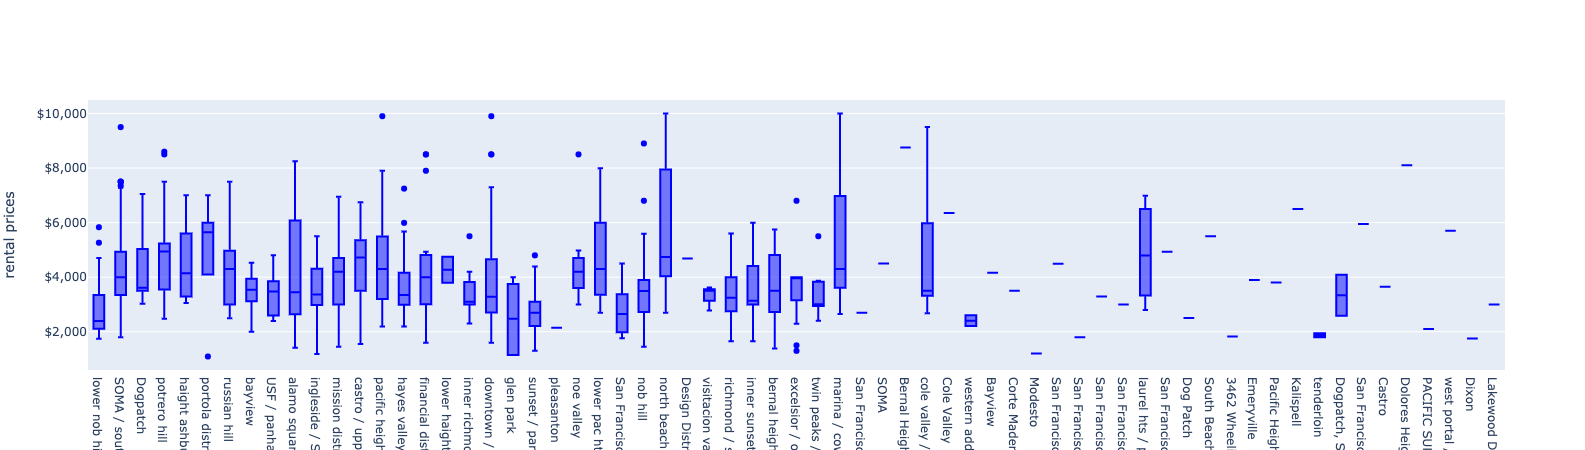

In [175]:

x = sf_cl_area['where']

trace0 = go.Box(
    y=sf_cl_area['price'],
    x=x,
    name='kale',
    marker=dict(
        color='blue'
    )
)

data = [trace0]

layout = go.Layout(
    yaxis=dict(
        title='rental prices',
        tickformat="$1,f",
        zeroline=False
    ),
    boxmode='group',
    
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

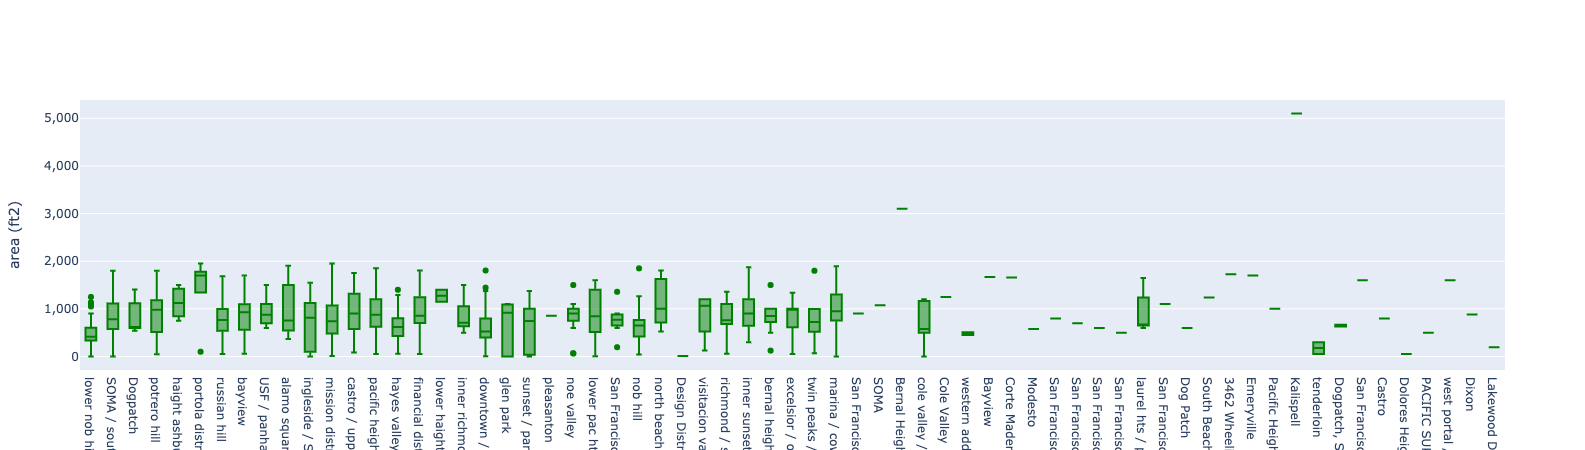

In [176]:

x = sf_cl_area['where']

trace0 = go.Box(
    y=sf_cl_area['area'],
    x=x,
    name='kale',
    marker=dict(
        color='green'
    )
)

data = [trace0]

layout = go.Layout(
    yaxis=dict(
        title='area (ft2)',
        tickformat="1,f",
        zeroline=False
    ),
    boxmode='group',
    
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

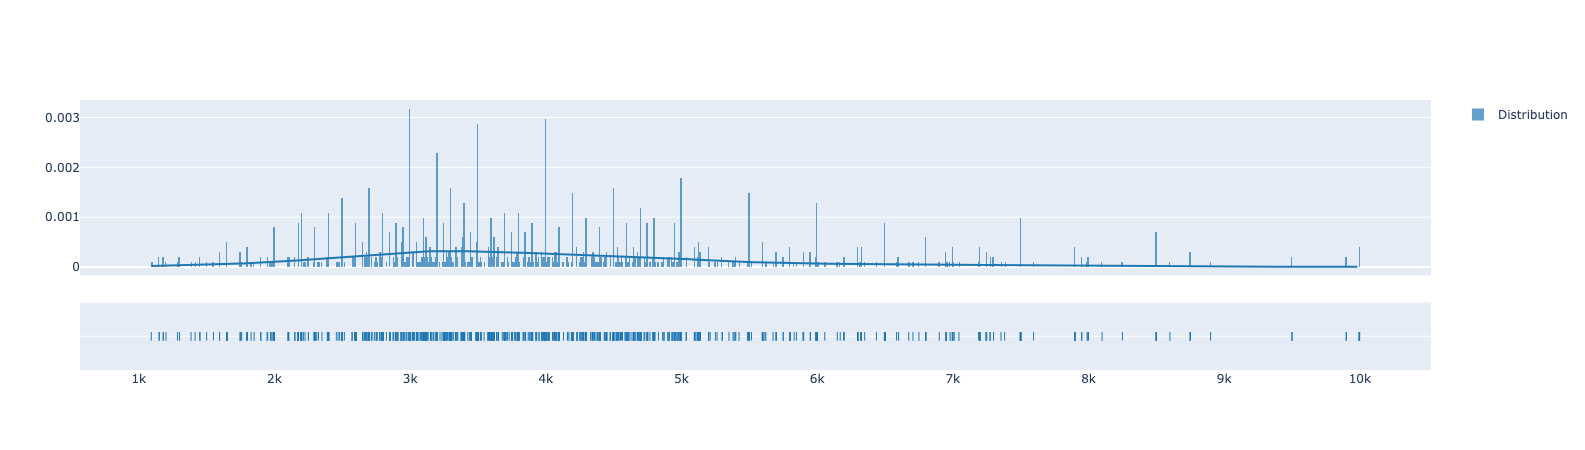

In [177]:
hist_data = [sf_cl_area['price']]
group_labels = ['Distribution']

fig = ff.create_distplot(hist_data, group_labels, bin_size=10)
iplot(fig, filename='Rental Price Distribution')

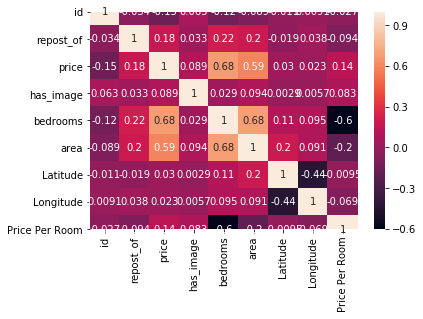

In [178]:
ax = sns.heatmap(sf_cl_area.corr(), annot=True)

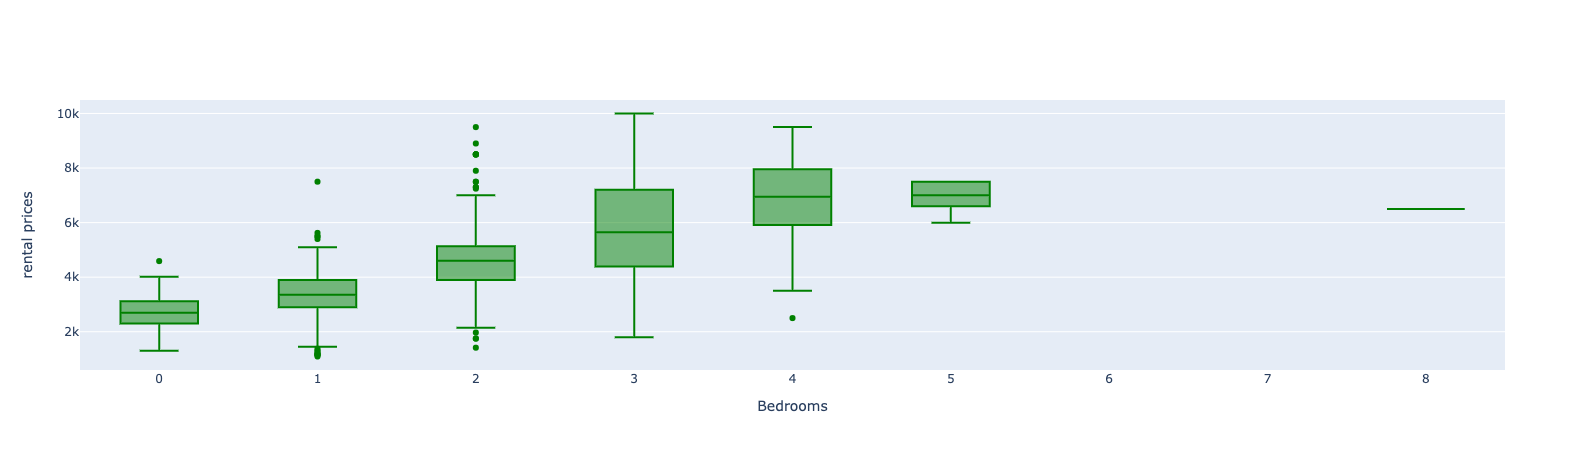

In [179]:
x = sf_cl_area['bedrooms']

trace0 = go.Box(
    y=sf_cl_area['price'],
    x=x,
    name='kale',
    marker=dict(
        color='Green'
    )
)

data = [trace0]
layout = go.Layout(
    yaxis=dict(
        title='rental prices',
        zeroline=False
    ),
    
    xaxis=dict(
        title='Bedrooms',
        zeroline=False
    ),
    boxmode='group'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

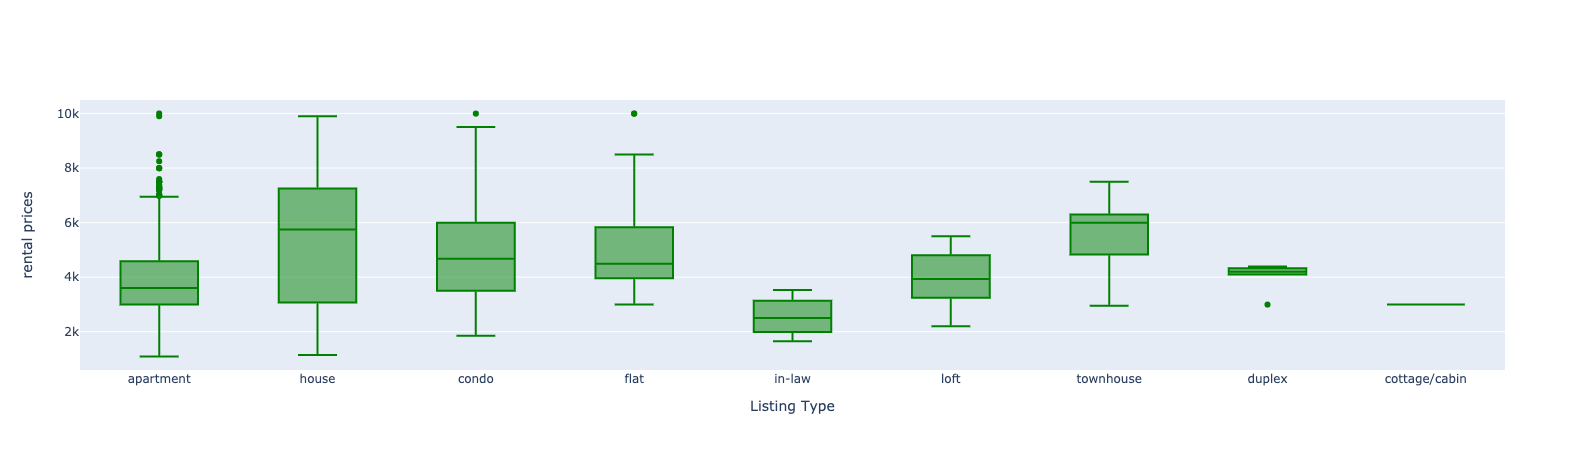

In [180]:
x = sf_cl_area['housing_type']

trace0 = go.Box(
    y=sf_cl_area['price'],
    x=x,
    name='kale',
    marker=dict(
        color='Green'
    )
)

data = [trace0]
layout = go.Layout(
    yaxis=dict(
        title='rental prices',
        zeroline=False
    ),
    
    xaxis=dict(
        title='Listing Type',
        zeroline=False
    ),
    boxmode='group'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [181]:
# insert map here 

### Predicitive Pricing model - Random Forrest

In [182]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [212]:
sf_model = sf_cl_area[['price', 'Latitude', 'Longitude', 'area', 'bedrooms']]
X_train_pr, x_test_pr, Y_train_pr, y_test_pr = train_test_split(sf_model.drop('price', axis=1), sf_model['price'])
model_pr = RandomForestRegressor(n_estimators=100)
model_pr.fit(X_train_pr, Y_train_pr)
pred_pr = model_pr.predict(x_test_pr)

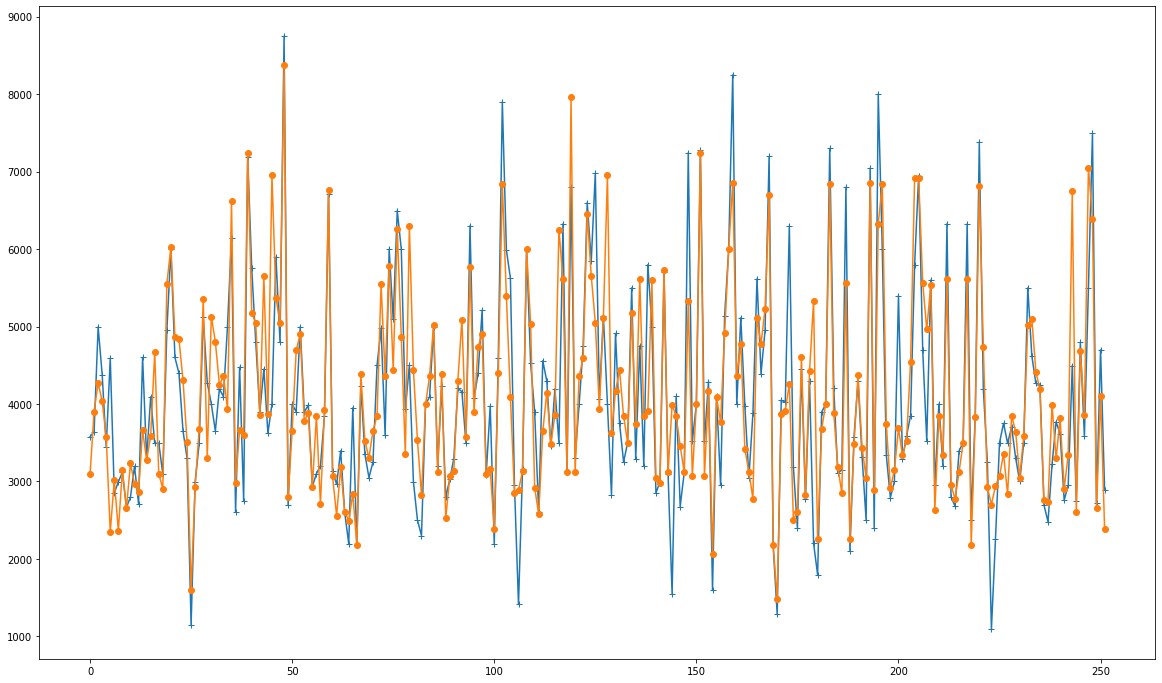

In [213]:
plt.figure(figsize=(20,12))

plt.plot(range(0, y_test_pr.shape[0]), y_test_pr, marker='+')
plt.plot(range(0, pred_pr.shape[0]), pred_pr, marker='o')

,feature,importance
3,bedrooms,0.370141
2,area,0.352733
0,Latitude,0.139328
1,Longitude,0.137797


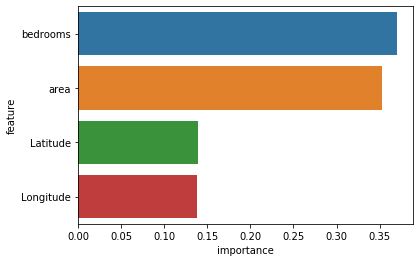

In [214]:
fi = pd.DataFrame({'feature': list(X_train_pr.columns),
                   'importance': model_pr.feature_importances_}).\
                    sort_values('importance', ascending = False)

display(fi)
sns.barplot(x=fi.importance, y=fi.feature)

In [215]:
model_pr.score(x_test_pr, y_test_pr)

0.7086048745452778

### Predicitive area model - Random Forrest

In [187]:
X_train_ar, x_test_ar, Y_train_ar, y_test_ar = train_test_split(sf_model.drop('area', axis=1), sf_model['area'])
model_ar = RandomForestRegressor(n_estimators=400)
model_ar.fit(X_train_ar, Y_train_ar)
pred_ar = model_ar.predict(x_test_ar)

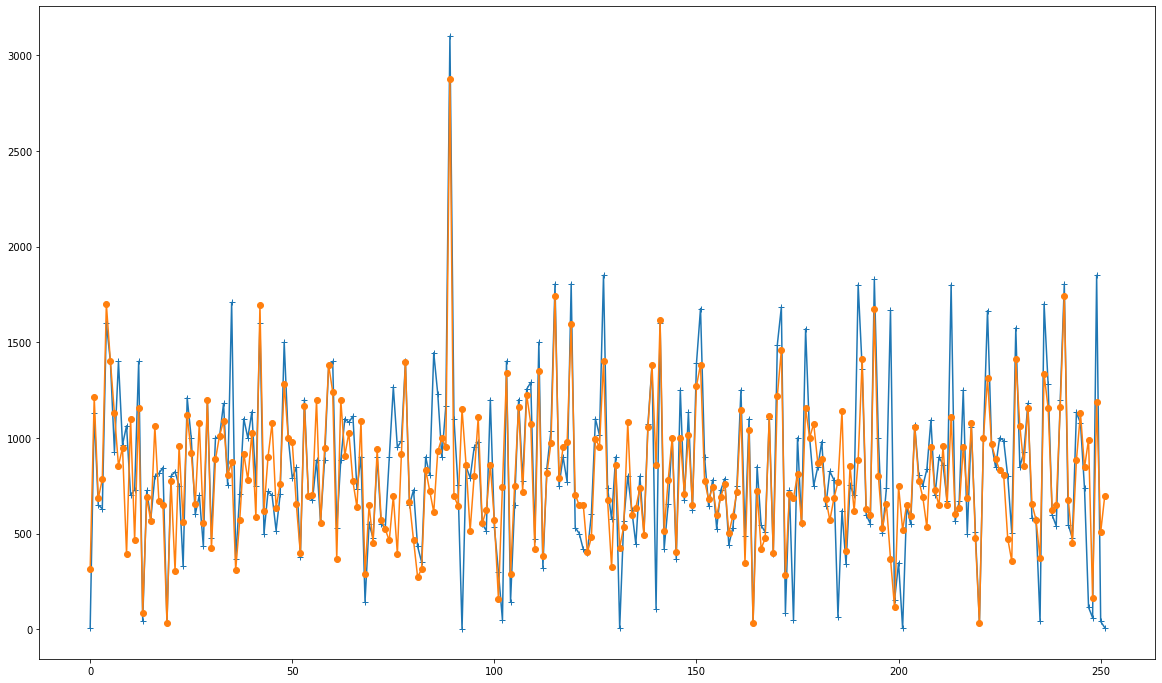

In [188]:
plt.figure(figsize=(20,12))

plt.plot(range(0, y_test_ar.shape[0]), y_test_ar, marker='+')
plt.plot(range(0, pred_ar.shape[0]), pred_ar, marker='o')

,feature,importance
3,bedrooms,0.432582
0,price,0.245838
1,Latitude,0.181635
2,Longitude,0.139945


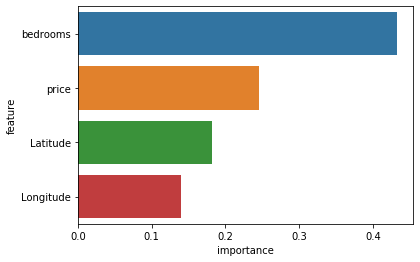

In [210]:
fi_ar = pd.DataFrame({'feature': list(X_train_ar.columns),
                   'importance': model_ar.feature_importances_}).\
                    sort_values('importance', ascending = False)

display(fi_ar)
sns.barplot(x=fi_ar.importance, y=fi_ar.feature)

In [211]:
model_ar.score(x_test_ar, y_test_ar)

0.6468334800367085

## Testing the Pricing and Area models

### Pricing Model Test

In [216]:
address = '1144 Haight St, San Francisco, CA 94117'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

price_pred = model_pr.predict([[latitude, longitude, 735, 1.0]])
print('The predicted price is: ${}'.format(float(price_pred)))

37.7708632 -122.4412537
The predicted price is: $3343.58


### Area Model Test

In [209]:
area_pred = model_ar.predict([[3123 , latitude, longitude, 1.0 ]])
print('The predicted area is: {}SQft'.format(float(area_pred)))

The predicted area is: 635.3375SQft


# Business problem #2 - Identifying High Quality Neighborhoods 

### #2- Part 1: Identifying areas with low rates of crime 

In [193]:
crime_df = pd.read_csv('/Users/brianmoore/Downloads/Police_Department_Incident_Reports__2018_to_Present.csv')

In [125]:
for i in crime_df:
    df_crime = crime_df.dropna(subset=['point', 'Latitude', 'Longitude'], axis=0)


df_crime['Latitude'] = df_crime['Latitude'].astype('str')
df_crime['Longitude'] = df_crime['Longitude'].astype('str')
df_crime['point'] = df_crime['point'].str.replace("[({':'})]", "")
df_crime['Incident Count'] = 1

In [126]:
crime_filt = df_crime.loc[(df_crime['Incident Year'] == 2020 )  , ['Incident Date','Incident Category', 'Analysis Neighborhood', 'point', 'Incident Count' ]]

In [132]:
crime_by_neh = crime_filt.groupby(['Analysis Neighborhood']).count().sort_values(by=['Incident Count'], ascending=True)

del crime_by_neh['point']
del crime_by_neh['Incident Date']
del crime_by_neh['Incident Category']
sf_crime_comb = pd.merge(sf_neh_df, crime_by_neh, left_on='Neighborhood', right_on='Analysis Neighborhood' )
del sf_crime_comb['Unnamed: 0']
sf_crime_comb.sort_values(by=['Incident Count'], ascending=True)


,Neighborhood,Latitude,Longitude,Incident Count
13,McLaren Park,37.786270,-122.489248,29
23,Seacliff,37.788540,-122.486920,36
16,Lincoln Park,37.781590,-122.494410,62
34,Presidio,37.799480,-122.467270,71
36,Treasure Island,37.824890,-122.370870,92
6,Glen Park,37.738410,-122.430990,134
35,Presidio Heights,37.790280,-122.451660,184
37,Twin Peaks,37.756690,-122.442240,187
26,Oceanview/Merced/Ingleside,37.710121,-122.466961,259
24,Noe Valley,37.751600,-122.429080,297


In [ ]:
# insert Clorapleth crime map (by neighborhood here)

### #2- Part 2: Identifying areas with high concentrations of "3rd places"

In [133]:
address = 'San Francisco'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('San Francisco Coordinates: {}, {}.'.format(latitude, longitude))

San Francisco Coordinates: 37.7790262, -122.4199061.


In [138]:
map_sf = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, neighborhood in zip(sf_nh_df['Latitude'], sf_nh_df['Longitude'], sf_nh_df['Neighborhood'] ):
    label= '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_sf)  
    
map_sf

In [139]:
CLIENT_ID = 'B5FDHGHAO3CYDCNC2N5GP4BTTKQEPQBFMIPJE0CMCS5AXUFH' # your Foursquare ID
CLIENT_SECRET = 'KC1VHVUYQO0RKME5PWQK434Z31CU0ABE45UCAVC0CNNVKYVP' # your Foursquare Secret
VERSION = '20180604'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: B5FDHGHAO3CYDCNC2N5GP4BTTKQEPQBFMIPJE0CMCS5AXUFH
CLIENT_SECRET:KC1VHVUYQO0RKME5PWQK434Z31CU0ABE45UCAVC0CNNVKYVP


In [140]:
radius = 2000
LIMIT = 300

venues = []


for lat, long, neighborhood in zip(sf_nh_df['Latitude'], sf_nh_df['Longitude'],sf_nh_df['Neighborhood']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [141]:
venues_df = pd.DataFrame(venues)
venues_df

,0,1,2,3,4,5,6
0,Bayview Hunters Point,37.73431,-122.37943,Archimedes Banya,37.730464,-122.372789,Spa
1,Bayview Hunters Point,37.73431,-122.37943,Speakeasy Ales & Lagers,37.738468,-122.380874,Brewery
2,Bayview Hunters Point,37.73431,-122.37943,TATO,37.736315,-122.390498,Mexican Restaurant
3,Bayview Hunters Point,37.73431,-122.37943,Flora Grubb Gardens,37.739589,-122.390171,Flower Shop
4,Bayview Hunters Point,37.73431,-122.37943,Radio Africa & Kitchen,37.734826,-122.390764,African Restaurant
...,...,...,...,...,...,...,...
3954,Western Addition,37.78095,-122.43222,Wiggle Bicycles,37.770954,-122.432215,Bike Shop
3955,Western Addition,37.78095,-122.43222,Boba Guys,37.772907,-122.423507,Bubble Tea Shop
3956,Western Addition,37.78095,-122.43222,The Little Chihuahua,37.772033,-122.437002,Burrito Place
3957,Western Addition,37.78095,-122.43222,Lafayette Park,37.791247,-122.428081,Park


In [143]:
venues_df.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(3959, 7)


,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Bayview Hunters Point,37.73431,-122.37943,Archimedes Banya,37.730464,-122.372789,Spa
1,Bayview Hunters Point,37.73431,-122.37943,Speakeasy Ales & Lagers,37.738468,-122.380874,Brewery
2,Bayview Hunters Point,37.73431,-122.37943,TATO,37.736315,-122.390498,Mexican Restaurant
3,Bayview Hunters Point,37.73431,-122.37943,Flora Grubb Gardens,37.739589,-122.390171,Flower Shop
4,Bayview Hunters Point,37.73431,-122.37943,Radio Africa & Kitchen,37.734826,-122.390764,African Restaurant


In [144]:
venues_df.groupby(["Neighborhood"]).count()

,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
Neighborhood,,,,,,
Bayview Hunters Point,58,58,58,58,58,58
Bernal Heights,100,100,100,100,100,100
Castro/Upper Market,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Excelsior,100,100,100,100,100,100
Financial District/South Beach,100,100,100,100,100,100
Glen Park,100,100,100,100,100,100
Golden Gate Park,100,100,100,100,100,100
Haight Ashbury,100,100,100,100,100,100


In [147]:
sf_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix='', prefix_sep='')

sf_onehot["Neighborhoods"] = venues_df['Neighborhood']

fixed_columns = [sf_onehot.columns[-1]] + list(sf_onehot.columns[:-1])
sf_onehot = sf_onehot[fixed_columns]


print(sf_onehot.shape)
sf_onehot.head()

sf_grouped = sf_onehot.groupby(["Neighborhoods"]).mean().reset_index()
print(sf_grouped.shape)
sf_grouped.head()

(3959, 302)
(41, 302)


,Neighborhoods,Accessories Store,Adult Boutique,African Restaurant,Alternative Healer,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Bath House,...,Tourist Information Center,Toy / Game Store,Track,Track Stadium,Trade School,Trail,Train Station,Trattoria/Osteria,Tunnel,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfall,Waterfront,Weight Loss Center,Windmill,Wine Bar,Wine Shop,Winery,Wings Joint,Yoga Studio,Zoo,Zoo Exhibit
0,Bayview Hunters Point,0.00,0.0,0.017241,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.017241,0.0,0.017241,0.00,0.0,0.0,0.00,0.034483,0.0,0.00,0.00,0.0,0.0,0.0,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.017241,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0
1,Bernal Heights,0.00,0.0,0.000000,0.00,0.01,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.01,0.0,0.0,0.00,0.030000,0.0,0.00,0.00,0.0,0.0,0.0,...,0.0,0.00,0.0,0.00,0.0,0.01,0.0,0.00,0.0,0.01,0.0,0.0,0.0,0.01,0.0,0.000000,0.0,0.0,0.00,0.00,0.0,0.00,0.03,0.0,0.0
2,Castro/Upper Market,0.01,0.0,0.000000,0.00,0.00,0.0,0.0,0.0,0.01,0.0,0.000000,0.0,0.010000,0.00,0.0,0.0,0.00,0.010000,0.0,0.00,0.00,0.0,0.0,0.0,...,0.0,0.01,0.0,0.01,0.0,0.03,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.01,0.0,0.000000,0.0,0.0,0.03,0.01,0.0,0.00,0.02,0.0,0.0
3,Chinatown,0.00,0.0,0.000000,0.00,0.01,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.01,0.0,0.0,0.00,0.000000,0.0,0.01,0.00,0.0,0.0,0.0,...,0.0,0.00,0.0,0.00,0.0,0.02,0.0,0.01,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.04,0.01,0.0,0.01,0.02,0.0,0.0
4,Excelsior,0.00,0.0,0.000000,0.01,0.01,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.00,0.0,0.0,0.01,0.040000,0.0,0.03,0.01,0.0,0.0,0.0,...,0.0,0.00,0.0,0.00,0.0,0.01,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.01,0.0,0.000000,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0


In [153]:
sf_dim_sum = sf_grouped[['Neighborhoods', 'Park', 'Gym', 'Coffee Shop']]
sf_dim_sum.head()

,Neighborhoods,Park,Gym,Coffee Shop
0,Bayview Hunters Point,0.034483,0.017241,0.051724
1,Bernal Heights,0.030000,0.000000,0.040000
2,Castro/Upper Market,0.070000,0.010000,0.090000
3,Chinatown,0.040000,0.020000,0.070000
4,Excelsior,0.060000,0.010000,0.060000


In [195]:
from sklearn.cluster import KMeans
kclusters = 7

sf_clustering = sf_dim_sum.drop(["Neighborhoods"], 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sf_clustering)

kmeans.labels_[0:10] 

array([0, 5, 4, 0, 4, 3, 4, 2, 2, 3], dtype=int32)

In [196]:
sf_merged = sf_dim_sum.copy()

sf_merged["Cluster Labels"] = kmeans.labels_

sf_merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
sf_merged.sort_values(by=['Park'], ascending=False)

sf_merged = pd.merge(sf_merged, sf_nh_df, on='Neighborhood')

sf_merged.rename(columns={'Latitude_x' : 'Latitude'}, inplace=True)
sf_merged.rename(columns={'Longitude_x' : 'Longitude'}, inplace=True)

del sf_merged['Unnamed: 0']

display(sf_merged.head())
print(sf_merged.shape)

,Neighborhood,Park,Gym,Coffee Shop,Cluster Labels,Latitude,Longitude
0,Bayview Hunters Point,0.034483,0.017241,0.051724,0,37.73431,-122.37943
1,Bernal Heights,0.030000,0.000000,0.040000,5,37.73903,-122.41621
2,Castro/Upper Market,0.070000,0.010000,0.090000,4,37.76122,-122.44411
3,Chinatown,0.040000,0.020000,0.070000,0,37.79539,-122.40812
4,Excelsior,0.060000,0.010000,0.060000,4,37.72104,-122.43160


(41, 7)


In [199]:
sf_merged['Park Score'] = (sf_merged['Park'] /sf_merged['Park'].max())*100
sf_merged['Gym Score'] = (sf_merged['Gym'] /sf_merged['Gym'].max())*100
sf_merged['Coffee Shop Score'] = (sf_merged['Coffee Shop'] /sf_merged['Coffee Shop'].max())*100
sf_merged['Totals'] = sf_merged['Park Score'] + sf_merged['Gym Score'] +sf_merged['Coffee Shop Score']
sf_merged.sort_values(by=['Park Score'], ascending=False)

,Neighborhood,Park,Gym,Coffee Shop,Cluster Labels,Latitude,Longitude,Park Score,Gym Score,Coffee Shop Score,Totals
8,Haight Ashbury,0.100000,0.010000,0.060000,2,37.769930,-122.446920,100.000000,25.000000,60.000000,185.000000
39,West of Twin Peaks,0.090000,0.000000,0.060000,2,37.750178,-122.447672,90.000000,0.000000,60.000000,150.000000
37,Twin Peaks,0.090000,0.010000,0.060000,2,37.756690,-122.442240,90.000000,25.000000,60.000000,175.000000
38,Visitacion Valley,0.081081,0.000000,0.013514,1,37.713070,-122.409310,81.081081,0.000000,13.513514,94.594595
31,Russian Hill,0.080000,0.010000,0.020000,1,37.802030,-122.419630,80.000000,25.000000,20.000000,125.000000
7,Golden Gate Park,0.080000,0.020000,0.060000,2,37.771440,-122.454140,80.000000,50.000000,60.000000,190.000000
16,Marina,0.080000,0.030000,0.040000,2,37.803370,-122.436930,80.000000,75.000000,40.000000,195.000000
14,Lincoln Park,0.070000,0.000000,0.010000,1,37.781590,-122.494410,70.000000,0.000000,10.000000,80.000000
2,Castro/Upper Market,0.070000,0.010000,0.090000,4,37.761220,-122.444110,70.000000,25.000000,90.000000,185.000000
17,McLaren Park,0.070000,0.010000,0.020000,1,37.786270,-122.489248,70.000000,25.000000,20.000000,115.000000


In [162]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sf_merged['Latitude'], sf_merged['Longitude'], sf_merged['Neighborhood'], sf_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Summary Visuals 

# Conclusions & Findings 